# 3 Root-Finding Methods


In order to numerically find the root(s) of a function, there are several methods that can be employed. Here we will explore the Bisection, Secant, Newton-Raphson, and Halley's methods. To illustrate how these methods work, we will look at the following function: $$f(x)\ =\ 0.5 x^3 + 0.25 x -7$$

A plot of the function can be seen below. Visually, we can see the root occurs between $2 < x < 3$. 

For these numerical root finding algorithms, guesses are iteratively improved until the difference between the old guess and the new guess is less than a defined threshold. This threshold is called the convergence threshold. The rate of convergence for each method can be defined as the number of steps required to reach this convergence threshold. Compare the number of steps for each method below for the same convergence threshold. 

This variable is set below as "tolerance".

In [1]:
##########
# IMPORTS
##########
# These are packages needed to perform the math and visualization
import numpy as np
import IPython
from IPython.display import Math
import matplotlib.pyplot as plt
import sympy as syp
x, y, z = syp.symbols('x y z')
import rf_helper_functions as pf
%matplotlib notebook


In [2]:
##########
# GLOBAL VARIABLES
##########
tolerance = 1e-6
steps_per_method = dict()
##########
# FUNCTIONS
##########


def f(x):
    return .5 * x**3 + .25 * x - 7


def fprime(x):
    return 3 * .5 * x**2 + .25


def fdoubleprime(x):
    return 2 * 3 * .5 * x

/home/amanda/programs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


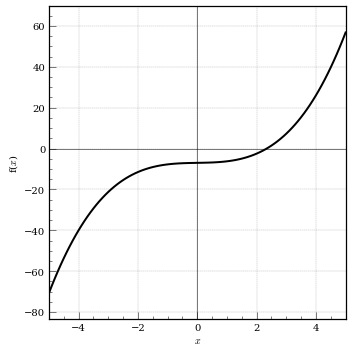

In [3]:
pf.plotf_func(-5, 5, f)

## 3.1 Bisection Method

The bisection method is a conceptually simple starting point for root finding methods. If a function $f(x)$ changes sign between $a$ and $b$, then it must pass through zero. You may have learned this as the intermediate value theorem. 


The bisection method begins by taking initial guesses $a$ and $b$ that are on either side of a root. An guess of the root is taken as the midpoint, $c\ =\ \frac{a+b}{2}$. If the sign change occurs between $a$ and $c$, the $c$ replaces $b$ and the next bisection is taken. If the sign change is not between $a$ and $c$, then it must occur between $c$ and $b$, and $c$ will replace the value of $a$.  This method guarantees convergence, but tends to be very slow. Often, this method is used to find a starting guess for more efficient root finding methods.

<img src="gif/Bisection.gif" width="500"/>

In [4]:
##########
# FUNCTIONS
##########


def midpoint(a, b):
    c = (a + b) / 2.
    return c
##########
# MAIN CODE
##########
converged = False
num_steps = 0
a = 0
b = 10
while not converged:
    c = midpoint(a, b)
    if np.sign(f(c)) == np.sign(f(a)):
        a = c
    else:
        b = c
    if abs((b - a) / 2.0) < tolerance:
        converged = True
    num_steps += 1
method = "Bisection"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(c))
print("Number of steps = {}".format(num_steps))


Method: Bisection
Root = 2.34101
Number of steps = 23


## 3.2 Secant Method

The Secant method evaluates $f(x)$ with an initial guess at two points ($x_0$ and $x_1$) near the root. To determine the two points of the next iteration, we first find the root ($x_2$) of the secant line between $x_0$ and $x_1$. We can define our secant line from the equation below:
$$ y\ =\ \frac{f(x_1)\ -\ f(x_0)}{x_1\ -\ x_0}(x_2-x_1)\ +\ f(x_1)$$

To find the root of the secant line, we set $y=0$:
$$ 0\ =\ \frac{f(x_1)\ -\ f(x_0)}{x_1\ -\ x_0}(x_2\ -\ x_1)\ +\ f(x_1)$$

and rearrange to solve for $x_2$. The result is:

$$x_2\ =\ x_1\ -\ f(x_1)\frac{x_1\ -\ x_0}{f(x_1)\ -\ f(x_0)}$$

The oldest guess ($x_0$) is discarded and the process is repeated with $x_1$ and $x_2$.

This is iterated, which results in the following recurrence relation:

$$x_n = x_{n-1}\ -\ f(x_{n-1})\frac{x_{n-1}\ -\ x_{n-2}}{f(x_{n-1})\ -\ f(x_{n-2})}$$

<img src="gif/secant.gif" width="500"/>

In [5]:
##########
# MAIN CODE
##########
x_old = 8
x_new = 7
num_steps = 0
converged = False
while not converged:
    temp = x_new
    x_new = x_new - (f(x_new) * ((x_new - x_old) / (f(x_new) - f(x_old))))
    x_old = temp
    num_steps += 1
    if np.abs(x_new - x_old) < tolerance:
        converged = True
method = "Secant"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(x_new))
print("Number of steps = {}".format(num_steps))


Method: Secant
Root = 2.34101
Number of steps = 10


## 3.3 Netwon-Raphson Method

The Newton-Raphson method utilizes a tangent line rather than the secant line we saw previously. This requires the first derivative of our function $f'(x)$. 

The method begins by taking an initial guess $x_0$.

To find a subsequent guess ($x_1$), we then use the following equation of a line tangent to $f(x)$ at $x_0$: 
$$y\ =\ f'(x_0)(x\ -\ x_0)\ +\ f(x_0)$$

The subsequent guess is defined as the root of the tangent line. To find that root we set $y$ equal to $0$:

$$0\ =\ f'(x_0)(x_1\ -\ x_0)\ +\ f(x_0)$$

This can be rearranged to:

$$x_1\ =\ x_0\ -\ \frac{f(x_0)}{f'(x_0)}$$

This is iterated, which results in the following recurrence relation:

$$x_n\ =\ x_{n-1}\ -\ \frac{f(x_{n-1})}{f'(x_{n-1})}$$

Below is a diagram that illustrates the iterative Newton-Raphson method.
<img src="gif/Newton.gif" width="500"/>

In [6]:
##########
# MAIN CODE
##########
converged = False
x_new = 7
num_steps = 0
while not converged:
    x_old = x_new
    x_new = x_old - (f(x_old) / (fprime(x_old)))
    num_steps += 1
    if np.abs(x_new - x_old) < tolerance:
        converged = True

method = "Newton-Raphson"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(x_new))
print("Number Steps = {}".format(num_steps))


Method: Newton-Raphson
Root = 2.34101
Number Steps = 7


## 3.4 Halley's Method

When evaluating the root of a function, methods that incorporate a derivative of the function are known as Householder methods.  For instance, the Newton-Raphson method (discussed above) utilizes the first derivative of the function and is known as a 1st class Householder method.  Second in the class of Householder methods is Halley's method, which incorporates the second derivative of the function. 

Halley's formula is very similar to the Newton-Raphson, but incorporates the second derivative in the denominator.  This correction is useful if it can be calculated easily. Due to the absence of a known second-derivative in many relevant physical chemistry problems, this method is often only applied for theoretical problems. If unable to be calculated with ease, it is more useful to carry out additional steps of Newton-Raphson.

To obtain Halley's relationship, let's first consider the function:

$$g(x)\ =\ \frac{f(x)}{\sqrt{\left|\ f'(x)\ \right|}}\ =\ f(x)\ \left|\ f'(x)\ \right|^{-\frac{1}{2}}$$

Now, taking the first derivative of g(x):

$$g'(x)\ =\ f'(x)\sqrt{\left|\ f'(x)\ \right|}\ -\ \frac{f(x)f''(x)}{{2\sqrt{\left|\ f'(x)\ \right|}\ f'(x)}}$$

This leads to:

$$g'(x)\ =\ \frac{1}{2\sqrt{\left|\ f'(x)\ \right|}\ f'(x)} \left(2f'(x)^2\ -\ f(x)f''(x)\right)$$

which can be simplified to:

$$g'(x)\ =\ \frac{2f'(x)^2\ -\ f(x)f''(x)}{2f'(x)\sqrt{\left|\ f'(x)\ \right|}}$$

Now, applying Newton's method:

$$x_n\ =\ x_{n-1}\ -\ \frac{g(x)}{g'(x)}$$

Substituting the $g(x)$ and $g'(x)$ from above and simplifying gives rise to the sequence of iterations for Halley's method:

$$x_n\ =\ x_{n-1}\ -\ \frac{2f(x_{n-1}) f'(x_{n-1})}{2\ [\ f'(x_{n-1})\ ]^2\ -\ f(x_{n-1})f''(x_{n-1})}$$

The plot below shows f(x) in black, and g(x) in red. We take the

<img src="gif/Halley.gif" width="500"/>

In [7]:
##########
# MAIN CODE
##########
x_new = 7
num_steps = 0
converged = False
while not converged:
    x_old = x_new
    x_new = x_old - (2 * f(x_old) * fprime(x_old)) / \
        ((2 * fprime(x_old)**2) - (f(x_old) * (fdoubleprime(x_old))))
    num_steps += 1
    if (np.abs(x_new - x_old) < tolerance):
        converged = True
method = "Halley's"
steps_per_method[method] = num_steps
print("Method: {}".format(method))
print("Root = {:.5f}".format(x_new))
print("Number of steps = {}".format(num_steps))


Method: Halley's
Root = 2.34101
Number of steps = 5


Halley's method is not widely implemented due to the necessity of calculating the second derivative. If a second derivative is avalable, Halley's method is able to out preform Newton's method within a certain number of steps. Below we show a comparison of Newton's method and Halley's method. After beginning at the same starting guess of the root, Halley's method is able to get much closer to the root within the four steps shown.

<img src="gif/combined.gif" width="800"/>

# 3.5 What method should be chosen?
Choosing from the many methods that exist for numerical root finding may be overwhelming.

First, it is important to consider the number of steps required for convergence. Below the number of steps required to reach the defined convergence threshold are tabulated.

In [8]:
print("{:->28}".format(""))
print("{:^20} : {:>5}".format("Method", "Steps"))
print("{:-^20}   {:->5}".format("", ""))
for i in sorted(steps_per_method, key=steps_per_method.get, reverse=True):
    print("{:^20} : {:>5}".format(i, steps_per_method[i]))
print("{:->28}".format(""))

----------------------------
       Method        : Steps
--------------------   -----
     Bisection       :    23
       Secant        :    10
   Newton-Raphson    :     7
      Halley's       :     5
----------------------------


If the function is inexpensive to evaluate and the first and second derivatives can be evaluated analytically, we would obviously choose Halley's Method. However, if the function and its derivatives are expensive to evaluate then Newton-Raphson may be preferable as it does not require second derivatives. The secant and bisection methods do not require derivatives, which would be preferable if analytical derivatives are not available. The bisection method has guaranteed convergence, but converges slowly. The choice of method is usually a trade off between convergence time and computational cost.

# Nodes of 3s orbital

The nodes of an s-orbital are places where there is zero probability of finding the electron. These nodes of the s orbital can be found using root finding methods....

$$ R_{30}\ =\ 2 \left( \frac{Z}{3a_0} \right)^{3/2} \left( 1 - \frac{2Zr}{3a_0} +\frac{2(Zr)^2}{27a_0^2} \right) e^{-Zr/3a_0}$$

# Your task!
1. Define a function called `R_30()` which calculates the function above. 
2. Ensure your function takes three input arguments in the following order: $Z$, $a0$, and $r$. 
3. Don't forget to have a replace the question marks below with the appropriate value to return!
2. Test your function with the second code block below. 

Hints:
1. Remember that when coding an expression such as $2Zr$ to multiply $2$ by $Z$ by $r$, we must write `2*Z*r`
2. We learned in the Introduction notebook that for some math function rely on external libraries. Here to code $e^{stuff}$, we will write this as `np.exp(stuff)`. In other words, we represent $e$ with `np.exp()` and any terms we needed exponentiated will go in the parentheses. 

In [9]:
## code your function here
def R_30():
    return ??

In [10]:
Z = 6
a0 = 1
r = 5

pf.check_R30(R_30,Z,a0,r)


CORRECT! Great job, you can continue to the next exercise


Now that you have correctly coded the example function above, we can find roots of this s orbital function. The nodal position will shift in position as the charge of the nuclei changes. We are going to use the bisection method to track this down. We are using this method for two reasons: it does not require a first derivative and it is guarunteed to converge (although it may take many iterations.)

One things we will experience here is how the starting guess in root finding will affect the estimate we get out. 

# Your task! (continuted)
To complete this task, you will run the cell block below **without changing anything**.
Continue to the text block below for furhter instruction


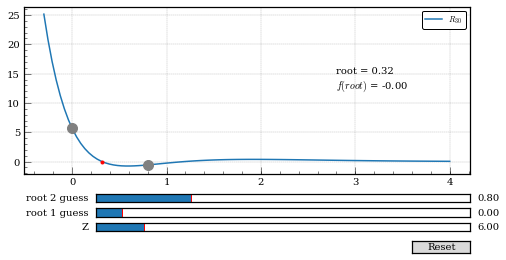

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import scipy.constants as sc


def bisection(a,b,f,Z,a0):
    tolerance = 0.000001
    converged = False
    num_steps = 0
    while not converged:
        c = midpoint(a,b)
        if np.sign(f(Z,a0,c)) == np.sign(f(Z,a0,a)):
            a = c
        else:
            b = c
        if abs((b - a) / 2.0) < tolerance:
            converged = True
        num_steps += 1
    return c

distance = np.linspace(-0.3,4,100)
initial_root_guess1 = 0
initial_root_guess2 = .8

initial_Z = 6 
# calculate R_30 function
R = R_30(initial_Z,a0,distance)
# calculate the real root with the root_guess at the starting point
root_real = bisection(initial_root_guess1,initial_root_guess2,R_30,initial_Z,a0)
#Plotting begins here.
fig,ax = plt.subplots(figsize=(8,4))
plt.grid(True)
plt.subplots_adjust(bottom=0.30)

ax.set_autoscale_on(True)
ax.autoscale_view(True,True,True)

line, = ax.plot(distance, R ,label = '$R_{30}$')
root_g1, = ax.plot(initial_root_guess1,R_30(initial_Z,a0,initial_root_guess1), linestyle='',marker='.', markersize = 20, color = 'gray')
root_g2, = ax.plot(initial_root_guess2,R_30(initial_Z,a0,initial_root_guess2), linestyle='',marker='.', markersize = 20, color = 'gray')
root_r, = ax.plot(root_real,R_30(initial_Z,a0,root_real), linestyle='',marker='.',color = 'red')

root_annotation = ax.annotate(r'root = {:.2f}'.format(root_real), xy = (max(distance)*0.7,max(R)*0.6))
f_annotation = ax.annotate(r"$f(root)$ = {:.2f}".format(R_30(initial_Z,a0,root_real)), xy = (max(distance)*0.7,0.5*max(R)))

########
plt.legend()
ax_Z = plt.axes([0.25, 0.1, 0.65, 0.03])
axguess = plt.axes([0.25, 0.15, 0.65, 0.03])
axguess2 = plt.axes([0.25, 0.20, 0.65, 0.03])
s_Z= Slider(ax_Z, 'Z', 1, 40, valinit=initial_Z)
s_guess2 = Slider(axguess2, 'root 2 guess', min(distance),max(distance),valinit=initial_root_guess2)
s_guess = Slider(axguess, 'root 1 guess', min(distance),max(distance),valinit=initial_root_guess1)

def update(val):
    #get the new values from sliders
    Z = s_Z.val
    root_guess1 = s_guess.val
    root_guess2 = s_guess2.val
    root_real = bisection(root_guess1,root_guess2,R_30, Z,a0)
    distance = np.linspace(-0.3,4,100)
    R = R_30(Z,a0,distance)
    line.set_ydata(R)
    root_r.set_data(root_real,R_30(Z,a0,root_real))
    root_g1.set_data(root_guess1,R_30(Z,a0,root_guess1))
    root_g2.set_data(root_guess2,R_30(Z,a0,root_guess2))
    root_annotation.set_text(r'root = {:.2f}'.format(root_real))
    f_annotation.set_text(r"$f(root)$ = {:.2f}".format(R_30(Z,a0,root_real)))
    axes.relim()
    
    axes.autoscale_view(True,True,True)
    fig.canvas.draw_idle()

s_Z.on_changed(update)
s_guess.on_changed(update)
s_guess2.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(resetax, 'Reset', hovercolor='0.975')


 
def reset(event):
    s_Z.reset()
    s_guess.reset()
    s_guess2.reset()
    
reset_button.on_clicked(reset)


plt.show()


For each value of Z, there will be two nodes in the 3-s wavefunction. We are going to locate these two roots as Z changes using the bisection method defined above. 

# Your Task (continued)
1. Move the Z value to be close to 12
2. Move the root 2 guess to somewhere left of the root.
3. Move the root 1 guess to somewhere right of the root.
4. Record where your Z value and  the value of the two roots you find.
5. Repeat steps 1-4 for Z values = 3,7, 20, 35

